Importing necessary libraries

In [ ]:
# ========== Standard Libraries ==========
import os  # For handling directory paths and file operations
from PIL import Image  # Python Imaging Library for image processing
import numpy as np  # Numerical operations on arrays and matrices
import pandas as pd  # Data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting graphs and visualizations
import seaborn as sns  # Enhanced visualization based on matplotlib
from glob import glob  # To retrieve files/path names matching a specified pattern

# ========== Scikit-learn Modules for ML tasks ==========
from sklearn.model_selection import train_test_split  # Splitting data into training and testing sets
from sklearn.metrics import classification_report, confusion_matrix  # Performance evaluation metrics

# ========== TensorFlow & Keras Deep Learning Modules ==========
import tensorflow as tf  # Main TensorFlow library
from tensorflow.keras.models import Sequential  # Sequential model for stacking layers
from tensorflow.keras.layers import Dense, Dropout, Flatten  # Common neural network layers
from tensorflow.keras.optimizers import Adamax, Adam  # Optimizers for compiling the model
from tensorflow.keras.metrics import Precision, Recall  # Evaluation metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For real-time image data augmentation

# ========== Miscellaneous ==========
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings to keep the output clean


## 🧠 Brain Tumor Dataset - Data Preparation

This module provides two utility functions to create structured DataFrames from training and testing datasets organized by class folders.

---

### 🔹 Function: `train_df(tr_path)`

Generates a DataFrame for training data.

#### Parameters:
- `tr_path` *(str)*: Path to the training dataset directory.

#### Returns:
- `pandas.DataFrame` with:
  - `Class Path`: Full path to each training image.
  - `Class`: Extracted label from folder name.

#### Example:
```python
tr_df = train_df(r'C:\Path\To\Training')


**Preprocessing**

In [ ]:
import os
import pandas as pd
import glob  # Used to search for file paths using patterns

def train_df(tr_path):
    """
    Generates a DataFrame containing image file paths and corresponding class labels.

    Parameters:
        tr_path (str): The path to the training dataset directory. 
                       Assumes the structure is: tr_path/class_name/image.jpg

    Returns:
        pandas.DataFrame: A DataFrame with two columns:
                          - 'Class Path': Full path to each image file.
                          - 'Class': The class label derived from the folder name.
    """
    
    # Get all image file paths recursively: tr_path/class_name/image.jpg
    image_paths = glob.glob(os.path.join(tr_path, "*", "*"))

    # Extract class names from folder names (i.e., one level up from image file)
    class_labels = [os.path.basename(os.path.dirname(img_path)) for img_path in image_paths]

    # Create a DataFrame with file paths and corresponding labels
    tr_df = pd.DataFrame({'Class Path': image_paths, 'Class': class_labels})
    
    return tr_df

# Example usage
tr_df = train_df(r'C:\Users\User\Desktop\Brain Tumor testing\Training')
tr_df


,Class Path,Class
0,C:\Users\User\Desktop\Brain Tumor testing\Trai...,glioma
1,C:\Users\User\Desktop\Brain Tumor testing\Trai...,glioma
2,C:\Users\User\Desktop\Brain Tumor testing\Trai...,glioma
3,C:\Users\User\Desktop\Brain Tumor testing\Trai...,glioma
4,C:\Users\User\Desktop\Brain Tumor testing\Trai...,glioma
...,...,...
5707,C:\Users\User\Desktop\Brain Tumor testing\Trai...,pituitary
5708,C:\Users\User\Desktop\Brain Tumor testing\Trai...,pituitary
5709,C:\Users\User\Desktop\Brain Tumor testing\Trai...,pituitary
5710,C:\Users\User\Desktop\Brain Tumor testing\Trai...,pituitary


In [ ]:
def test_df(ts_path):
    """
    Generates a DataFrame containing image file paths and corresponding class labels
    from the testing dataset directory.

    Parameters:
        ts_path (str): The path to the testing dataset directory. 
                       Assumes the structure is: ts_path/class_name/image.jpg

    Returns:
        pandas.DataFrame: A DataFrame with two columns:
                          - 'Class Path': Full path to each image file.
                          - 'Class': The class label derived from the folder name.
    """
    # Get all image file paths recursively
    image_paths = glob.glob(os.path.join(ts_path, "*", "*"))

    # Extract class names from folder names (one level up from image file)
    class_labels = [os.path.basename(os.path.dirname(img_path)) for img_path in image_paths]

    # Create a DataFrame
    ts_df = pd.DataFrame({'Class Path': image_paths, 'Class': class_labels})
    return ts_df

# ✅ Corrected example usage
ts_df = test_df(r'C:\Users\User\Desktop\Brain Tumor testing\Testing')
ts_df


,Class Path,Class
0,C:\Users\User\Desktop\Brain Tumor testing\Test...,glioma
1,C:\Users\User\Desktop\Brain Tumor testing\Test...,glioma
2,C:\Users\User\Desktop\Brain Tumor testing\Test...,glioma
3,C:\Users\User\Desktop\Brain Tumor testing\Test...,glioma
4,C:\Users\User\Desktop\Brain Tumor testing\Test...,glioma
...,...,...
1306,C:\Users\User\Desktop\Brain Tumor testing\Test...,pituitary
1307,C:\Users\User\Desktop\Brain Tumor testing\Test...,pituitary
1308,C:\Users\User\Desktop\Brain Tumor testing\Test...,pituitary
1309,C:\Users\User\Desktop\Brain Tumor testing\Test...,pituitary


## 📊 Visualization: Class Distribution in Training Data

This plot displays the number of images in each class (e.g., Glioma, Meningioma, Pituitary) within the training dataset. It helps to:

- Identify class imbalances
- Understand dataset structure before training a model

### 🛠 Libraries Used
- `matplotlib.pyplot` for plot rendering
- `seaborn` for styling and simplified plotting

### 🖼 Sample Output (Bar Plot)
- Y-axis: Class Labels
- X-axis: Image Count
- Bar labels: Numeric count on each bar
- Color Palette: `viridis` (a perceptually uniform colormap)

### 🔍 Code Highlights

```python
ax = sns.countplot(data=tr_df, y='Class', palette='viridis')
ax.bar_label(ax.containers[0])  # Annotate bars with counts


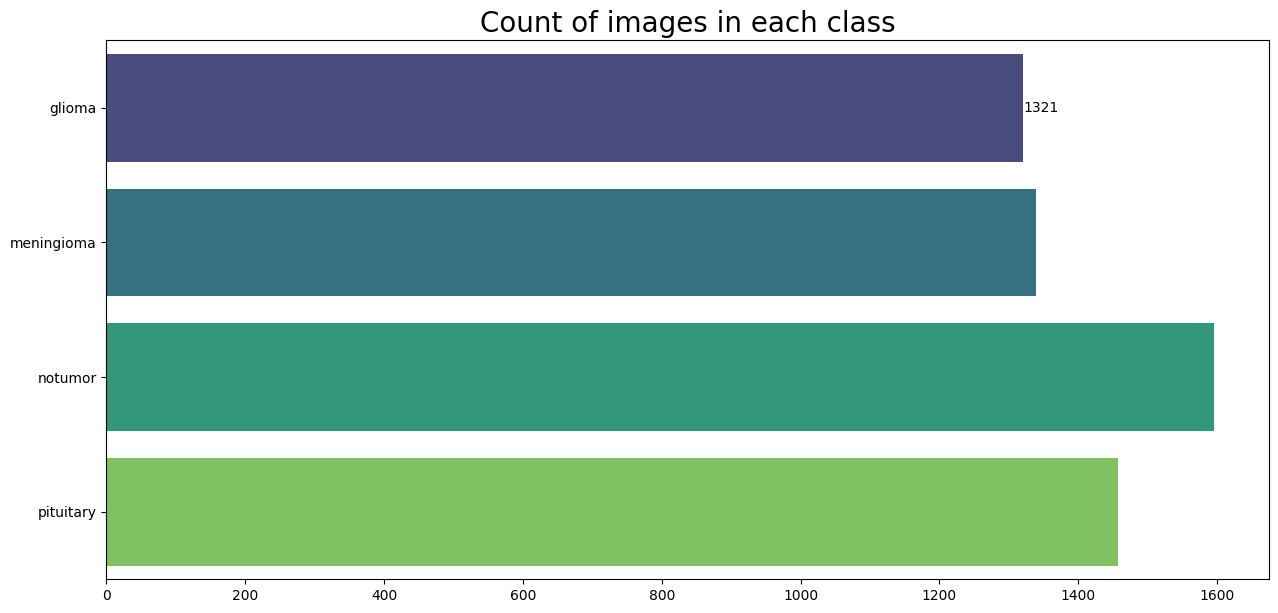

In [ ]:
# Set figure size
plt.figure(figsize=(15, 7))

# Create a horizontal bar plot for class distribution
ax = sns.countplot(data=tr_df, y='Class', palette='viridis')

# Remove default axis labels for a cleaner look
plt.xlabel('')
plt.ylabel('')

# Add custom title
plt.title('Count of Images in Each Class', fontsize=20)

# Display the count on each bar
ax.bar_label(ax.containers[0])

# Show the plot
plt.show()


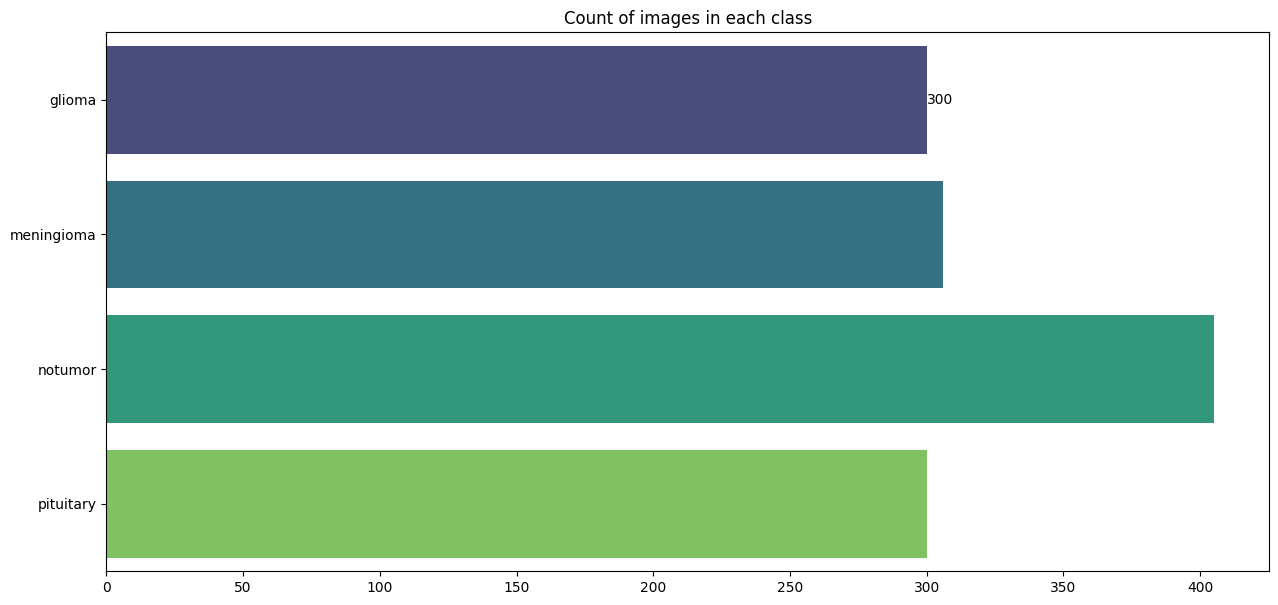

In [ ]:
# Set figure size for the plot
plt.figure(figsize=(15, 7))

# Create a horizontal bar plot for class distribution in the test data
ax = sns.countplot(y=ts_df['Class'], palette='viridis')

# Remove axis labels for a cleaner look
ax.set(xlabel='', ylabel='', title='Count of Images in Each Class')

# Add count labels on the bars
ax.bar_label(ax.containers[0])

# Show the plot
plt.show()


## 🚀 Splitting Test Dataset into Validation and Test Sets

This step divides the test dataset (`ts_df`) into two parts: one for validation (`valid_df`) and one for testing (`ts_df`).

### 🔧 Parameters:
- **`train_size=0.5`**: Specifies that 50% of the data should be used for the validation set.
- **`random_state=20`**: Ensures reproducibility by setting a fixed random seed.
- **`stratify=ts_df['Class']`**: Ensures that the class distribution is preserved in both splits, which is important to avoid class imbalance.

### 💡 Result:
- **`valid_df`**: Contains 50% of the original test dataset, used for validation.
- **`ts_df`**: Contains the remaining 50% for final testing.

### 🔍 Code Breakdown:
```python
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])


In [ ]:
# Split the test dataset into validation and test sets (50% each) while stratifying by 'Class' column
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])

# `valid_df` now contains 50% of the original test data (for validation)
# `ts_df` now contains the other 50% of the original test data (remaining test set)


In [10]:
valid_df

,Class Path,Class
286,C:\Users\User\Desktop\Brain Tumor testing\Test...,glioma
318,C:\Users\User\Desktop\Brain Tumor testing\Test...,meningioma
1072,C:\Users\User\Desktop\Brain Tumor testing\Test...,pituitary
373,C:\Users\User\Desktop\Brain Tumor testing\Test...,meningioma
109,C:\Users\User\Desktop\Brain Tumor testing\Test...,glioma
...,...,...
59,C:\Users\User\Desktop\Brain Tumor testing\Test...,glioma
860,C:\Users\User\Desktop\Brain Tumor testing\Test...,notumor
273,C:\Users\User\Desktop\Brain Tumor testing\Test...,glioma
494,C:\Users\User\Desktop\Brain Tumor testing\Test...,meningioma


## 📸 Image Data Generators for Training, Validation, and Testing

### **Purpose**
The code creates **ImageDataGenerator** objects for the training, validation, and testing datasets. It applies various image augmentations to the training data and only rescaling to validation and test datasets. This approach helps the model generalize better and prevents overfitting.

### **Key Parameters**
- **`batch_size=32`**: Defines the number of images per batch during training.
- **`img_size=(299, 299)`**: Resizes images to 299x299 pixels, which is a common input size for models like InceptionV3.
- **`rescale=1/255`**: Scales pixel values to the range [0, 1].
- **Augmentation Techniques**:
  - **`brightness_range=(0.8, 1.2)`**: Randomly adjusts the brightness of images.
  - **`rotation_range=20`**: Rotates images by a random angle within 20 degrees.
  - **`width_shift_range=0.2` & `height_shift_range=0.2`**: Shifts images horizontally and vertically by 20%.
  - **`shear_range=0.2`**: Applies shear transformation.
  - **`zoom_range=0.2`**: Zooms in and out by 20%.
  - **`horizontal_flip=True`**: Flips images horizontally for better generalization.

### **Data Generators**
- **`tr_gen`**: Used for training with image augmentation. 
  - **Shuffling** is enabled to avoid any biases.
  - **`class_mode='categorical'`**: For multi-class classification.

- **`valid_gen`**: Used for validation with no augmentation, only rescaling.
  - **Shuffling** is disabled to maintain the same order of data.
  - **`class_mode='categorical'`**: For multi-class classification.

- **`ts_gen`**: Used for testing with no augmentation, only rescaling.
  - **Shuffling** is disabled to maintain data consistency during testing.

### **Usage Example**
```python
# Example: Get one batch of images from the training generator
x_batch, y_batch = next(tr_gen)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
batch_size = 32
img_size = (299, 299)  # Target image size for resizing

# Image augmentation generator for training data
gen = ImageDataGenerator(
    rescale=1/255,  # Normalize pixel values to the range [0, 1]
    brightness_range=(0.8, 1.2),  # Adjust brightness of images
    rotation_range=20,  # Randomly rotate images within the range of 20 degrees
    width_shift_range=0.2,  # Randomly shift the image horizontally by up to 20%
    height_shift_range=0.2,  # Randomly shift the image vertically by up to 20%
    shear_range=0.2,  # Apply shear transformation to the image
    zoom_range=0.2,  # Zoom in/out by 20%
    horizontal_flip=True,  # Flip images horizontally for data augmentation
    fill_mode='nearest'  # Fill missing pixels after transformation with the nearest pixel
)

# Generator for test data (no augmentation, only rescaling)
ts_gen = ImageDataGenerator(rescale=1/255)

# Generator for training data with augmentation
tr_gen = gen.flow_from_dataframe(tr_df, 
                                 x_col='Class Path',  # Path to the image files
                                 y_col='Class',  # Class labels
                                 batch_size=batch_size,  # Size of each batch
                                 target_size=img_size,  # Resize images to target size (299x299)
                                 class_mode='categorical',  # Categorical labels
                                 shuffle=True)  # Shuffle data for training

# Generator for validation data (no augmentation, only rescaling)
valid_gen = ImageDataGenerator(rescale=1/255).flow_from_dataframe(valid_df, 
                                                                x_col='Class Path', 
                                                                y_col='Class', 
                                                                batch_size=batch_size, 
                                                                target_size=img_size, 
                                                                class_mode='categorical', 
                                                                shuffle=False)  # Don't shuffle validation set

# Generator for test data (no augmentation, only rescaling)
ts_gen = ImageDataGenerator(rescale=1/255).flow_from_dataframe(ts_df, 
                                                               x_col='Class Path', 
                                                               y_col='Class', 
                                                               batch_size=16,  # Smaller batch size for testing
                                                               target_size=img_size, 
                                                               shuffle=False)  # No shuffling for test data


Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


## 🔍 Visualizing a Batch of Images with Class Labels

### **Purpose**
This code visualizes a batch of images from the test dataset and displays their predicted class labels. This is useful for:
- Verifying the data generation pipeline.
- Ensuring that images are correctly paired with their labels.
- Visualizing the performance of the image classification model in a batch.

### **Steps**
1. **`class_dict`**: 
   - Retrieves the mapping between class labels and their corresponding indices from the training data generator (`tr_gen`).
2. **`classes`**:
   - Extracts the class names from `class_dict` (e.g., Glioma, Meningioma).
3. **`images, labels = next(ts_gen)`**:
   - Retrieves a batch of images and their associated labels from the test data generator (`ts_gen`).
   - The labels are one-hot encoded, and **`np.argmax(label)`** is used to get the class index.
4. **Image Display**:
   - **`plt.imshow(image)`**: Displays each image in the batch.
   - **`plt.title(class_name)`**: Shows the class name (predicted label) as the title of each image.
   - The images are arranged in a **4x4 grid**.

### **Output**
The output will be a grid of images from the test dataset, with each image's predicted class label shown above it.

### 🖼 Example Output
- A 4x4 grid with images of brain tumors.
- Each image will have a title displaying its predicted class (e.g., Glioma, Meningioma).


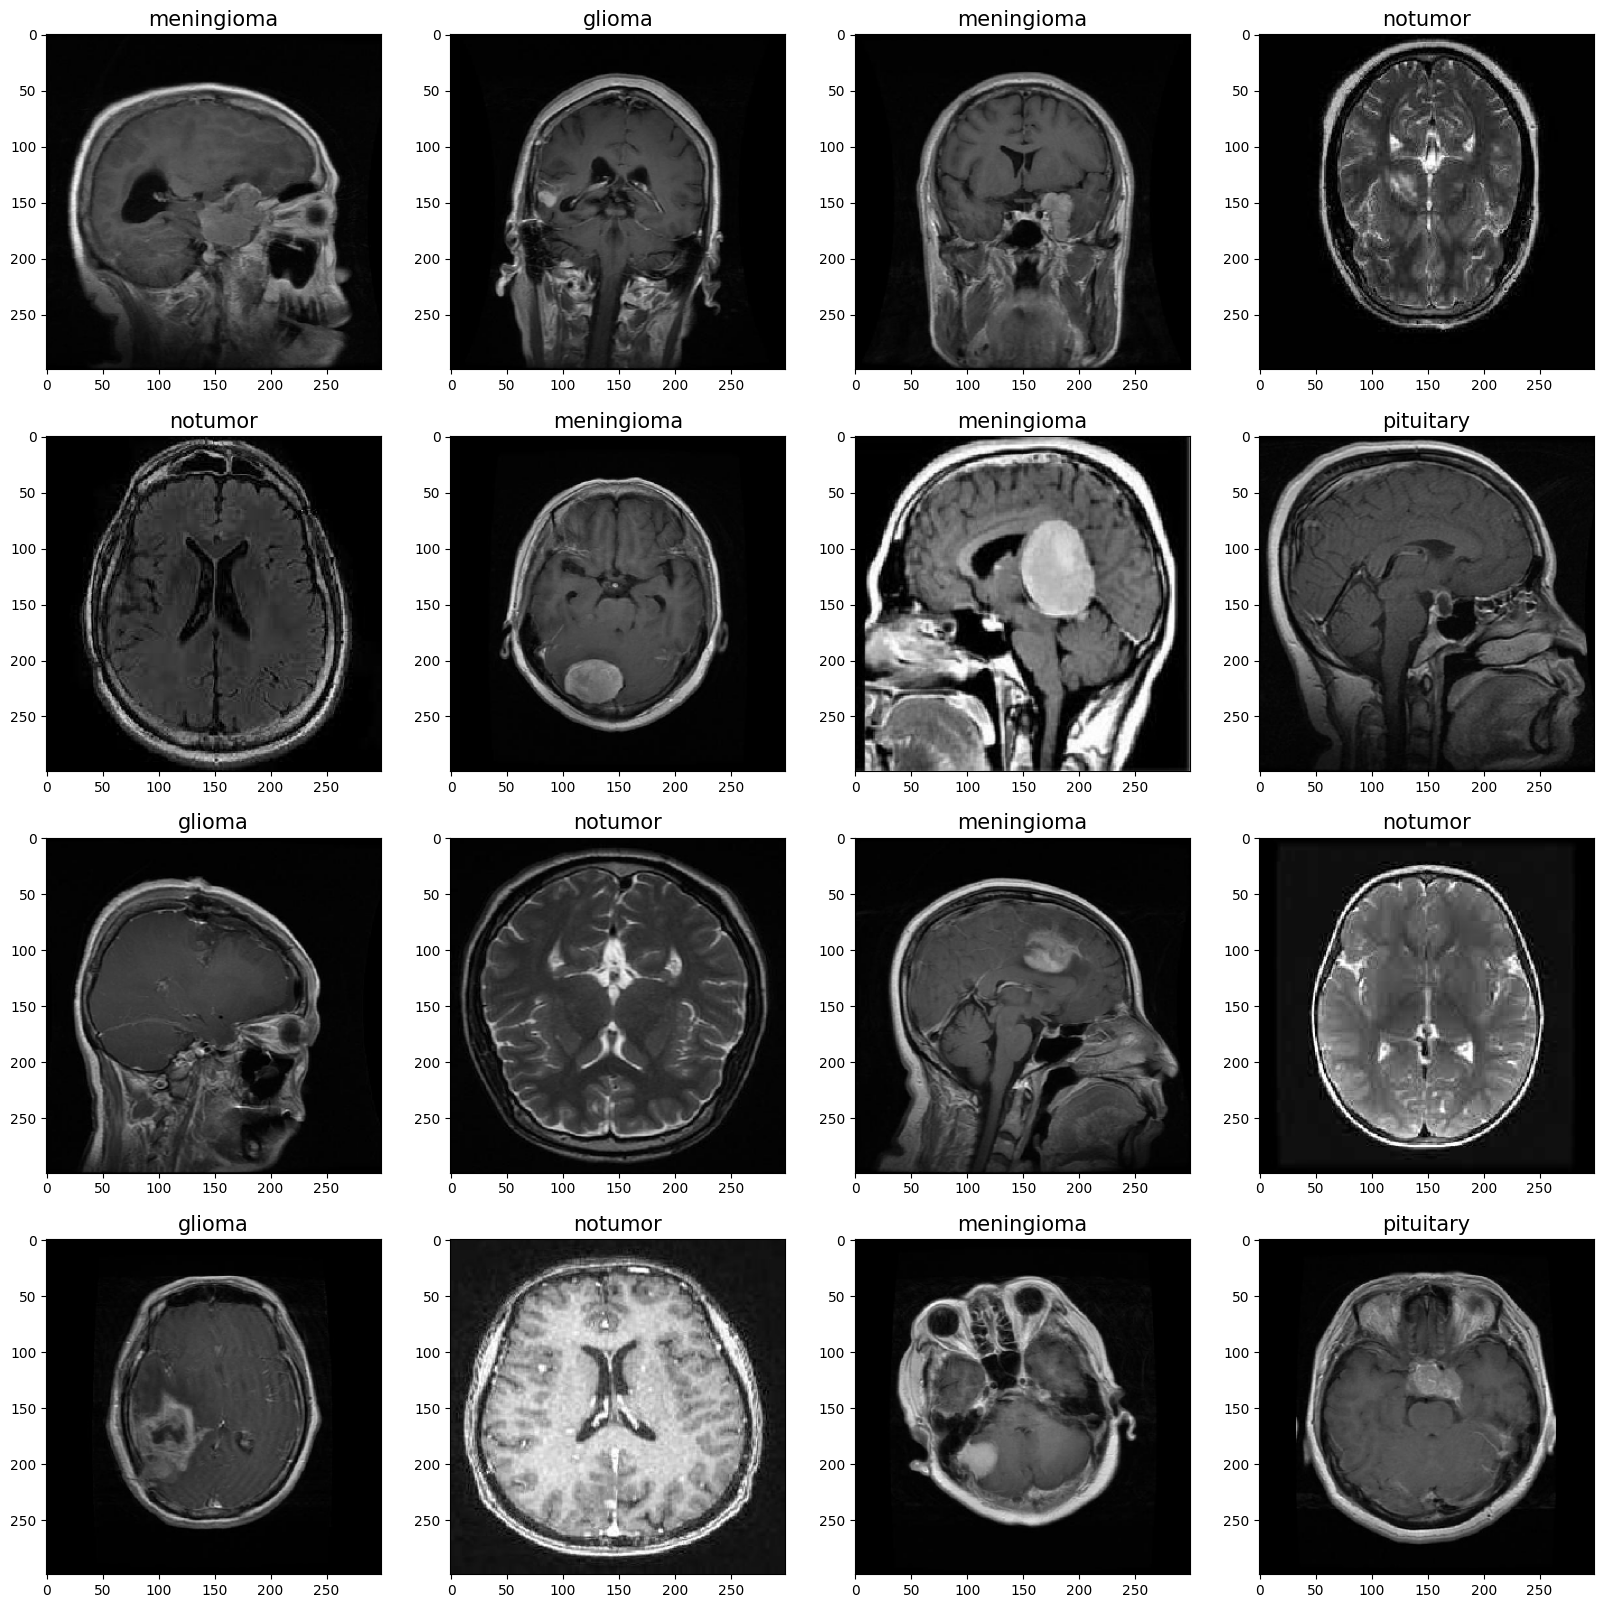

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the class indices from the training generator (class to index mapping)
class_dict = tr_gen.class_indices
# List of class names (from the generator's class index)
classes = list(class_dict.keys())

# Get a batch of images and labels from the test generator
images, labels = next(ts_gen)

# Create a figure for displaying images
plt.figure(figsize=(20, 20))

# Loop through each image and label in the batch
for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4, 4, i + 1)  # Create a 4x4 grid for the images
    plt.imshow(image)  # Display the image
    class_name = classes[np.argmax(label)]  # Get the class name from the label (one-hot encoded)
    plt.title(class_name, color='k', fontsize=15)  # Display the class name as the title

# Show the plot
plt.show()


## 🚀 Building a CNN Model with Xception Base

### **Purpose**
The code builds a custom CNN model using **Xception** as the base (pretrained on ImageNet) and adds custom layers for fine-tuning. The model is designed for multi-class classification, with the final layer having 4 output units corresponding to the number of classes.

### **Key Components**
1. **Xception Model**:
   - **`include_top=False`**: Excludes the fully connected layers from the original Xception model.
   - **`weights='imagenet'`**: Loads the pre-trained weights from ImageNet.
   - **`input_shape=(299, 299, 3)`**: Defines the input image shape for the model.
   - **`pooling='max'`**: Uses global max pooling to reduce the dimensionality of the feature maps.

2. **Custom Layers**:
   - **`Flatten()`**: Flattens the 2D feature maps into a 1D vector to feed into fully connected layers.
   - **`Dropout()`**: Regularization layers to prevent overfitting, with rates of 0.3 and 0.25.
   - **`Dense(128, activation='relu')`**: A fully connected layer with 128 units and ReLU activation.
   - **`Dense(4, activation='softmax')`**: The output layer with 4 units (for 4 classes), using softmax activation for multi-class classification.

3. **Model Compilation**:
   - **`optimizer=Adam()`**: The Adam optimizer for efficient training.
   - **`loss='categorical_crossentropy'`**: The loss function for multi-class classification.
   - **`metrics=['accuracy', Precision(), Recall()]`**: Additional metrics to evaluate the model's performance, including accuracy, precision, and recall.

### **Optional Freezing of Layers**:
You can choose to freeze the layers of the **Xception** model so that they are not updated during training. This can be done by setting `layer.trainable = False` for each layer in the base model. This is useful when fine-tuning with a smaller dataset to prevent overfitting.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

# Set input image shape
img_shape = (299, 299, 3)

# Load the Xception model as the base model (without the top classification layers)
base_model = tf.keras.applications.Xception(
    include_top=False,  # Exclude the top layers (i.e., the fully connected classification layers)
    weights="imagenet",  # Use pretrained weights from ImageNet
    input_shape=img_shape,  # Define the input image shape (299x299 with 3 color channels)
    pooling='max'  # Use max pooling on the final convolutional feature maps
)

# Optional: Freeze the base model layers to prevent retraining during the initial phase
# for layer in base_model.layers:
#     layer.trainable = False

# Build the model with additional custom layers
model = Sequential([
    base_model,  # Add the Xception base model as the first layer
    Flatten(),  # Flatten the output of the base model into a 1D vector
    Dropout(rate=0.3),  # Dropout regularization to reduce overfitting
    Dense(128, activation='relu'),  # Fully connected layer with ReLU activation
    Dropout(rate=0.25),  # Dropout regularization after the dense layer
    Dense(4, activation='softmax')  # Output layer with softmax for multi-class classification (4 classes)
])

# Compile the model with the Adam optimizer and additional metrics
model.compile(
    optimizer=Adam(),  # Adam optimizer for efficient training
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy', Precision(), Recall()]  # Metrics to evaluate performance (accuracy, precision, recall)
)

# Print the summary of the model to check the architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 2048)           │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,124,268 (80.58 MB)

 Trainable params: 21,069,740 (80.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

## 📊 Visualizing Augmented Images from Training Data

### **Purpose**
This code displays a few images from the **training data generator (`tr_gen`)**, which includes data augmentation. This allows you to verify that the data augmentation transformations (e.g., rotation, zoom, flipping) are applied correctly to the images.

### **Steps**
1. **`batch = next(tr_gen)`**:
   - Retrieves the next batch of images from the training data generator (`tr_gen`). This batch contains both images and their corresponding labels.
   
2. **Unpacking the Batch**:
   - **`images, labels = batch`**: Unpacks the batch into the images and labels.

3. **Creating the Plot**:
   - **`fig, axes = plt.subplots(1, 5, figsize=(15, 5))`**: Creates a figure with 5 subplots arranged in 1 row, to display 5 images.
   
4. **Displaying the Images**:
   - **`axes[i].imshow(images[i])`**: Displays each image in the batch.
   - **`axes[i].axis('off')`**: Hides the axes for a cleaner presentation of the images.

5. **Show the Plot**:
   - **`plt.show()`**: Displays the plot with the 5 images.

### **Output**
The output will be a plot with 5 images from the training batch, showing the images with applied augmentations.

### **Example Output**:
- A 1x5 grid displaying images with transformations (e.g., rotation, zoom, flips).


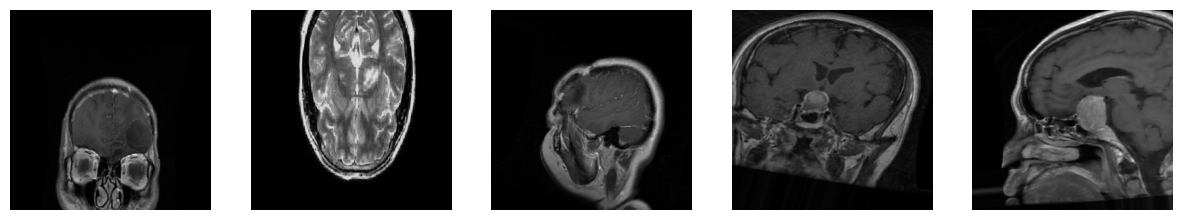

In [ ]:
import matplotlib.pyplot as plt

# Get a batch of augmented images from the training generator
batch = next(tr_gen)
images, labels = batch  # Unpack the images and labels from the batch

# Create a figure with subplots to display the images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))  # 1 row, 5 columns of images

# Loop through the first 5 images in the batch
for i in range(5):
    axes[i].imshow(images[i])  # Display the image
    axes[i].axis('off')  # Hide the axes for better image presentation

# Show the plot with the images
plt.show()


## 🏋️‍♂️ Training the Model

### **Purpose**
This code trains the model using the **training data generator (`tr_gen`)** and evaluates its performance on the **validation data generator (`valid_gen`)** over **10 epochs**. The `shuffle=False` ensures that the data is processed in its original order (useful for certain tasks like time series or when shuffling is not required).

### **Parameters**
1. **`tr_gen`**:
   - This is the data generator for training, which yields batches of images and labels with data augmentation applied.

2. **`epochs=10`**:
   - Specifies the number of complete passes through the training dataset. In this case, the model will train for 10 epochs.

3. **`validation_data=valid_gen`**:
   - This specifies the validation data generator (`valid_gen`) that provides validation data. This helps in monitoring the model's performance after each epoch to avoid overfitting.

4. **`shuffle=False`**:
   - This prevents the dataset from being shuffled between epochs. This setting is important when you want to preserve the order of data, for example, when working with time-series data or when shuffling might lead to incorrect training sequences.

### **Output**
The function returns the training history object (`hist`), which contains information about the loss and accuracy for both the training and validation sets over each epoch.

### **Example Output**
The model's training progress will be displayed in the console during the training process, showing:
- Training loss and accuracy for each epoch.
- Validation loss and accuracy after each epoch.


In [ ]:
# Train the model using the training generator and validate using the validation generator
hist = model.fit(
    tr_gen,  # Training data generator
    epochs=10,  # Number of epochs to train the model
    validation_data=valid_gen,  # Validation data generator to evaluate the model during training
    shuffle=False  # Set shuffle=False because the data should not be shuffled in sequential order for time-dependent tasks
)


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 2491s 14s/step - accuracy: 0.7447 - loss: 0.7431 - precision: 0.8125 - recall: 0.6414 - val_accuracy: 0.4214 - val_loss: 10.8666 - val_precision: 0.4214 - val_recall: 0.4214
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 2568s 14s/step - accuracy: 0.9232 - loss: 0.2554 - precision: 0.9399 - recall: 0.9050 - val_accuracy: 0.8198 - val_loss: 1.1169 - val_precision: 0.8243 - val_recall: 0.8168
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 2421s 14s/step - accuracy: 0.9462 - loss: 0.1761 - precision: 0.9562 - recall: 0.9344 - val_accuracy: 0.8702 - val_loss: 0.4127 - val_precision: 0.8756 - val_recall: 0.8595
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 2231s 12s/step - accuracy: 0.9667 - loss: 0.1087 - precision: 0.9711 - recall: 0.9642 - val_accuracy: 0.9038 - val_loss: 0.5030 - val_precision: 0.9048 - val_recall: 0.8992
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 2447s 14s/step - accuracy: 0.9700 - loss: 0.1035 - precision: 0.9712 - recall: 0.9666 - val_accuracy: 0.946

In [16]:
hist_keys = hist.history.keys()

In [32]:
model.save("cnn_final_model.h5")


## 📊 Plotting Model Training Metrics Over Epochs

### **Purpose**
This code visualizes the training and validation metrics during model training, including:
- **Loss**
- **Accuracy**
- **Precision**
- **Recall**

The key features of the visualization include:
- **Training vs. Validation**: For each metric, both the training and validation curves are plotted.
- **Best Epoch**: The epoch where each metric reaches its best value (e.g., lowest loss or highest accuracy) is highlighted with a blue marker.

### **Steps**
1. **Extract Metrics**:
   - Training and validation loss, accuracy, precision, and recall are extracted from the training history.

2. **Find Best Epoch**:
   - The index of the best epoch for each metric is identified (e.g., lowest validation loss or highest validation accuracy).

3. **Create Subplots**:
   - A 2x2 grid is created to plot:
     - Training and validation loss.
     - Training and validation accuracy.
     - Precision and validation precision.
     - Recall and validation recall.
     
4. **Plot the Metrics**:
   - **`plt.scatter()`** marks the best epoch for each metric in blue.
   - The `grid` is enabled for clarity.

5. **Display the Plot**:
   - The plots are displayed with a title that includes all training metrics.

### **Output**
The output will be a 2x2 grid of plots, each showing:
- **Training and Validation Loss**
- **Training and Validation Accuracy**
- **Precision and Validation Precision**
- **Recall and Validation Recall**

Each plot will also indicate the best epoch for each metric.

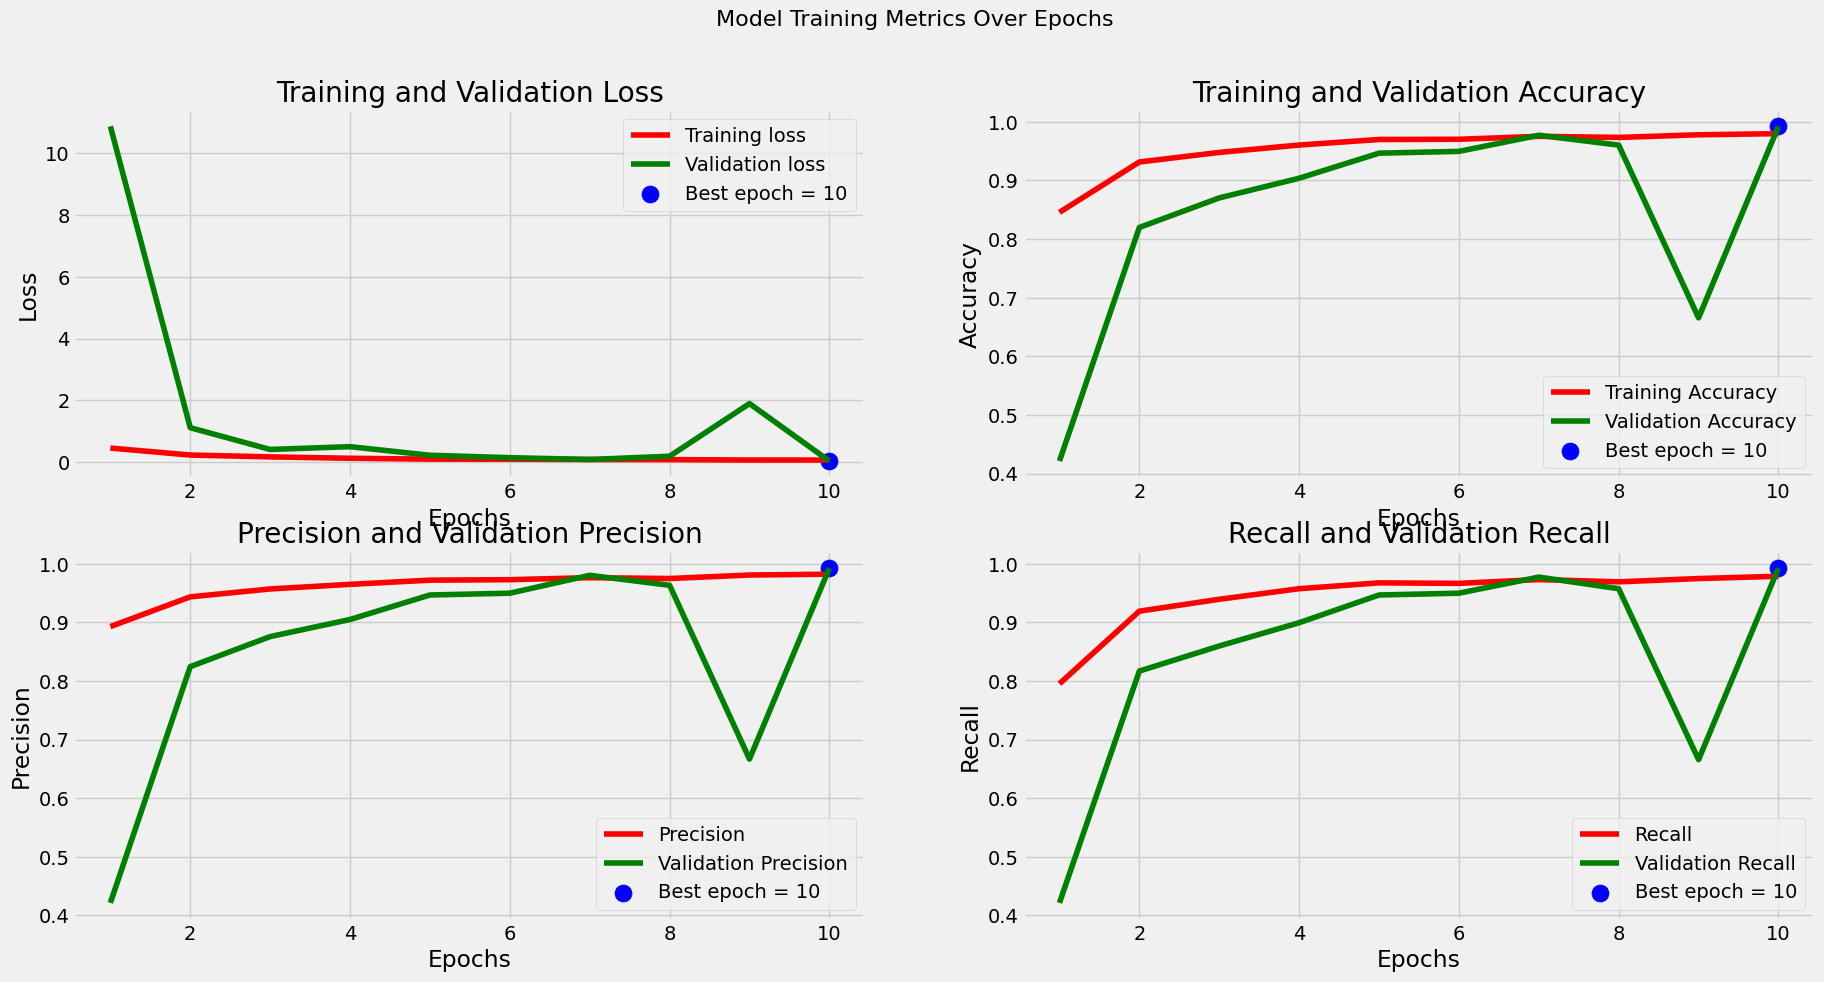

In [33]:

tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
tr_per = hist.history['precision']
tr_recall = hist.history['recall']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
val_per = hist.history['val_precision']
val_recall = hist.history['val_recall']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'


plt.figure(figsize=(20, 10))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, 'r', label='Precision')
plt.plot(Epochs, val_per, 'g', label='Validation Precision')
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
plt.title('Precision and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, 'r', label='Recall')
plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
plt.title('Recall and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

## 🧑‍💻 Model Evaluation

### **Purpose**
The following code evaluates the trained model on three different datasets:
1. **Training Dataset** (`tr_gen`)
2. **Validation Dataset** (`valid_gen`)
3. **Test Dataset** (`ts_gen`)

### **Steps**
1. **Evaluate on Training Data**: 
   - `train_score = model.evaluate(tr_gen, verbose=1)`
   - This calculates the loss and accuracy on the training data.

2. **Evaluate on Validation Data**:
   - `valid_score = model.evaluate(valid_gen, verbose=1)`
   - This calculates the loss and accuracy on the validation data.

3. **Evaluate on Test Data**:
   - `test_score = model.evaluate(ts_gen, verbose=1)`
   - This calculates the loss and accuracy on the test data.

4. **Display Results**:
   - The results are printed for each dataset (Training, Validation, and Test) with formatted loss and accuracy values.

### **Output**
The expected output will show the loss and accuracy for each dataset, for example:



In [19]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

179/179 ━━━━━━━━━━━━━━━━━━━━ 450s 3s/step - accuracy: 0.9830 - loss: 0.0650 - precision: 0.9843 - recall: 0.9823
21/21 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.9935 - loss: 0.0431 - precision: 0.9935 - recall: 0.9935
41/41 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9829 - loss: 0.0796 - precision: 0.9829 - recall: 0.9829
Train Loss: 0.0586
Train Accuracy: 98.48%
--------------------
Validation Loss: 0.0387
Validation Accuracy: 99.24%
--------------------
Test Loss: 0.0901
Test Accuracy: 98.48%


## 🧑‍💻 Model Predictions and Class Label Conversion

### **Purpose**
This code predicts the class labels for the test dataset and converts the predicted probabilities into the actual class labels.

### **Steps**
1. **Prediction on Test Data**:
   - `preds = model.predict(ts_gen)`
   - This generates the predicted probabilities for each class in the test dataset (`ts_gen`). The output shape will be `(num_samples, num_classes)`.

2. **Convert Probabilities to Class Labels**:
   - `y_pred = np.argmax(preds, axis=1)`
   - This converts the predicted probabilities into class labels by selecting the index of the maximum probability for each sample.
   - `axis=1` means that the function will operate on each row (which corresponds to each sample in the batch), converting the predicted probabilities into the predicted class index.

### **Output**
- **`preds`**: An array with predicted probabilities for each class.
- **`y_pred`**: An array of predicted class labels corresponding to the test data, where each element is the index of the class with the highest probability.


In [ ]:
# Predict probabilities for the test dataset
preds = model.predict(ts_gen)

# Convert probabilities to predicted class labels
y_pred = np.argmax(preds, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step


## 🧑‍💻 Confusion Matrix Evaluation

### **Purpose**
This code generates and visualizes a confusion matrix to evaluate the performance of the model's predictions on the test dataset.

### **Steps**
1. **Generate Confusion Matrix**:
   - `cm = confusion_matrix(ts_gen.classes, y_pred)`
   - This function compares the true labels (`ts_gen.classes`) with the predicted labels (`y_pred`) and computes the confusion matrix. It helps understand how the model's predictions match the true classes.

2. **Visualize Confusion Matrix**:
   - `sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)`
   - This generates a heatmap to visualize the confusion matrix. The `annot=True` argument annotates the heatmap cells with the count of predictions for each class.
   - `fmt='d'` ensures the values are displayed as integers (since they represent counts).
   - `cmap='Blues'` applies a blue color scheme to the heatmap.

### **Output**
- A heatmap displaying the confusion matrix, with:
  - Rows representing actual classes.
  - Columns representing predicted classes.
  - Diagonal cells showing correct predictions, while off-diagonal cells indicate misclassifications.


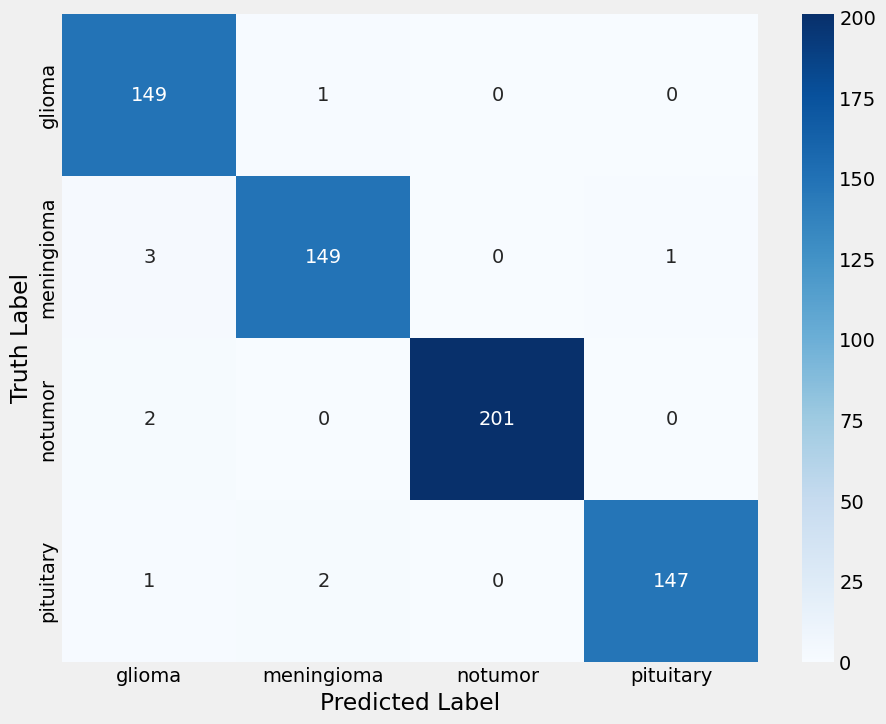

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)

# Plot the confusion matrix as a heatmap
labels = list(class_dict.keys())  # Get the class labels
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

## 🧑‍💻 Classification Report

### **Purpose**
This code generates and prints a classification report that includes metrics like precision, recall, F1-score, and support for each class in the test dataset.

### **Steps**
1. **Generate Classification Report**:
   - `clr = classification_report(ts_gen.classes, y_pred)`
   - This function compares the true labels (`ts_gen.classes`) with the predicted labels (`y_pred`) and calculates several performance metrics for each class:
     - **Precision**: True positives / (True positives + False positives)
     - **Recall**: True positives / (True positives + False negatives)
     - **F1-score**: 2 * (Precision * Recall) / (Precision + Recall)
     - **Support**: The number of true instances for each class.

2. **Display Report**:
   - `print(clr)` prints the classification report to the console.

### **Output**
The output is a text-based report showing the metrics for each class, for example:



In [35]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       150
           1       0.98      0.97      0.98       153
           2       1.00      0.99      1.00       203
           3       0.99      0.98      0.99       150

    accuracy                           0.98       656
   macro avg       0.98      0.98      0.98       656
weighted avg       0.99      0.98      0.98       656



## MRI Tumor Segmentation and Classification

This script performs **MRI tumor segmentation** using **K-Means clustering** and classifies the tumor type using a **pre-trained CNN model**. The results include segmented tumor regions and a prediction of the tumor type with probabilities.

## Table of Contents
1. [Overview](#overview)
2. [Functions](#functions)
   - [segment_tumor](#segment_tumor)
   - [classify_tumor](#classify_tumor)
   - [process_image](#process_image)
3. [Usage](#usage)
4. [Example Output](#example-output)

---

## Overview

This script works with MRI images to achieve two main objectives:
1. **Tumor Segmentation**: The image is processed using K-Means clustering and Otsu’s thresholding method to segment the tumor from the surrounding tissue.
2. **Tumor Classification**: The image is classified into one of four tumor categories (`glioma`, `meningioma`, `notumor`, `pituitary`) using a pre-trained CNN model.

## Functions

### `segment_tumor(image_path, K=3)`

This function segments the tumor in the given MRI image using K-Means clustering, followed by Otsu’s thresholding. It outputs the original image, the segmented tumor, and the binary mask of the tumor.

#### Parameters:
- `image_path`: The path to the MRI image to be processed.
- `K`: The number of clusters for K-Means (default is 3).

#### Returns:
- `original`: The original MRI image in grayscale.
- `segmented_image`: The segmented image after applying K-Means clustering.
- `mask`: A binary mask of the tumor region.

---

### `classify_tumor(image_path)`

This function uses a pre-trained CNN model to classify the tumor in the given MRI image. It returns the classified tumor type and the corresponding confidence score.

#### Parameters:
- `image_path`: The path to the MRI image to be classified.

#### Returns:
- `resized_img`: The resized image (299x299) used for prediction.
- `probs`: The predicted class probabilities.
- `predicted_label`: The predicted tumor type.
- `confidence`: The confidence score of the predicted label.

---

### `process_image(image_path)`

This function integrates both tumor segmentation and classification. It visualizes the results in a figure displaying:
- The **original MRI** image.
- The **segmented tumor** after applying K-Means clustering.
- The **extracted tumor mask**.
- The **classification result** with the prediction label, confidence score, and class probabilities.

#### Parameters:
- `image_path`: The path to the MRI image to be processed.

#### Returns:
- None (Displays the results in a matplotlib figure).

---

## Usage

To use this script, simply call the `process_image(image_path)` function with the path to the MRI image you want to process. The function will:
1. Segment the tumor using K-Means clustering.
2. Classify the tumor using the pre-trained CNN model.
3. Display the results with images and classification details.


In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.gridspec as gridspec
from tensorflow.keras.models import load_model
import os

# Load the trained CNN model
model = load_model("cnn_final_model.h5")

# Define class labels
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

def segment_tumor(image_path, K=3):
    """ Applies K-Means clustering for tumor segmentation, handling darker tumors """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply CLAHE for better contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    image = clahe.apply(image)

    # Flatten the image into a 2D array
    pixel_values = image.reshape((-1, 1)).astype(np.float32)

    # Apply K-Means clustering
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert cluster centers to 8-bit values
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()].reshape(image.shape)

    # Use Otsu's thresholding to determine tumor region
    _, otsu_mask = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find the cluster closest to the Otsu threshold
    tumor_cluster = np.argmin(np.abs(centers - np.mean(image[otsu_mask == 255])))

    # Create mask based on tumor cluster
    mask = (labels.flatten() == tumor_cluster).astype(np.uint8).reshape(image.shape) * 255

    return image, segmented_image, mask




def classify_tumor(image_path):
    """ Classifies the tumor type using the CNN model """
    try:
        img = Image.open(image_path).convert('RGB')
        resized_img = img.resize((299, 299))  # Resize to match model input
        img_array = np.asarray(resized_img) / 255.0  # Normalize
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Predict using CNN model
        predictions = model.predict(img_array)
        probs = predictions[0]
        predicted_label = labels[np.argmax(probs)]
        confidence = np.max(probs)

        return resized_img, probs, predicted_label, confidence

    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None, None, None, None

def process_image(image_path):
    """ Segments tumor and classifies the MRI scan, then displays the results """
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        return

    # Perform segmentation
    original, segmented, mask = segment_tumor(image_path)

    # Perform classification
    resized_img, probs, predicted_label, confidence = classify_tumor(image_path)

    fig = plt.figure(figsize=(6, 4))
    gs = gridspec.GridSpec(2, 3, height_ratios=[2, 1])  # First row taller than second

    # First row (3 images)
    ax1 = plt.subplot(gs[0, 0])
    ax2 = plt.subplot(gs[0, 1])
    ax3 = plt.subplot(gs[0, 2])

    # Second row (1 large classification box)
    ax4 = plt.subplot(gs[1, :])  # Spans all 3 columns

    # Display images
    ax1.imshow(original, cmap='gray')
    ax1.set_title("Original MRI")

    ax2.imshow(segmented, cmap='gray')
    ax2.set_title("K-Means Segmentation")

    ax3.imshow(255 - mask, cmap='gray')
    ax3.set_title("Extracted Tumor Mask")

    # Filter out probabilities greater than 0
    non_zero_probs = [(label, probs[i]) for i, label in enumerate(labels) if probs[i] > 0]

    # Format the probabilities into a readable text
    prob_text = "\n".join([f"{label}: {prob:.2f}" for label, prob in non_zero_probs])

    # Display classification result in a text box
    ax4.set_xticks([])
    ax4.set_yticks([])
    ax4.text(0.5, 0.5, f"Prediction: {predicted_label} ({confidence:.2f})\n\nClass Probabilities:\n{prob_text}",
             fontsize=12, ha='center', va='center',
             bbox=dict(facecolor='lightgray', edgecolor='black', boxstyle='round,pad=0.5'))

    # Remove axes for a cleaner look
    for ax in [ax1, ax2, ax3, ax4]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()




## Testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step


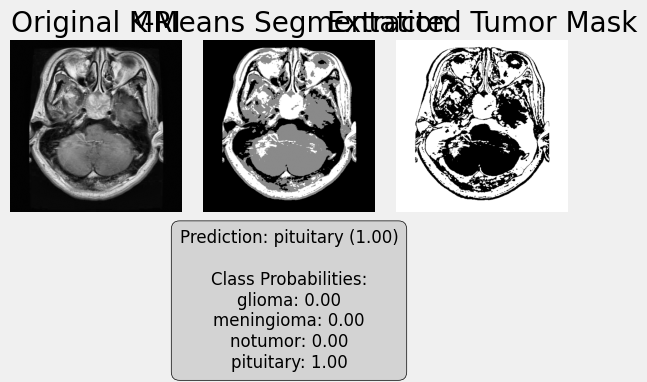

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


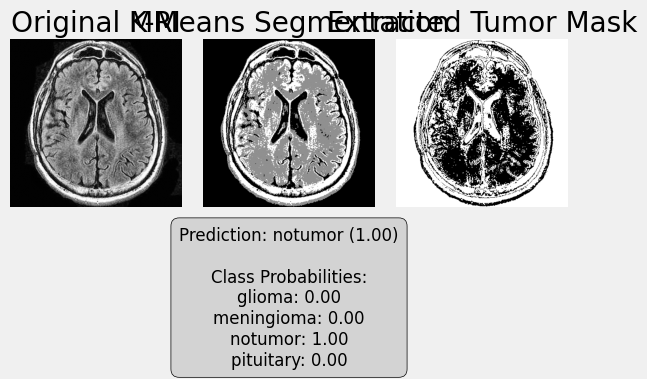

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


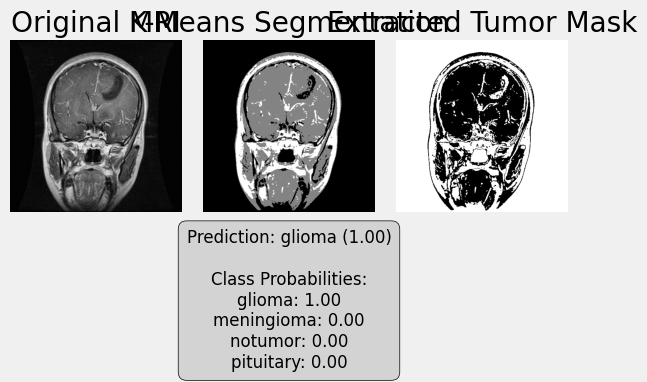

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


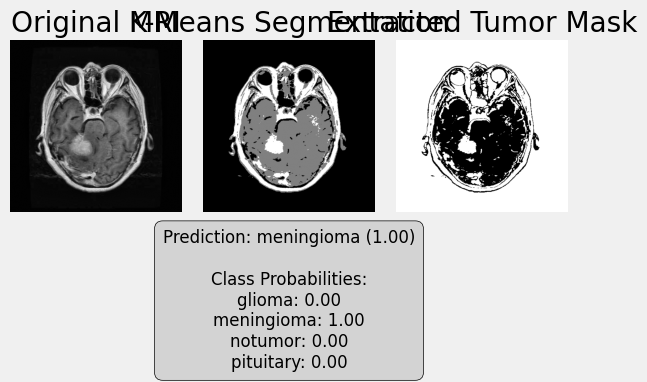

In [24]:
# Example usage with multiple images
image_paths = [
    r"C:\Users\User\Desktop\Brain Tumor testing\Testing\pituitary\Te-pi_0024.jpg",
    r"C:\Users\User\Desktop\Brain Tumor testing\Testing\notumor\Te-no_0276.jpg",
    r"C:\Users\User\Desktop\Brain Tumor testing\Testing\glioma\Te-gl_0071.jpg",
    r"C:\Users\User\Desktop\Brain Tumor testing\Testing\meningioma\Te-me_0121.jpg"

]

for path in image_paths:
    process_image(path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step


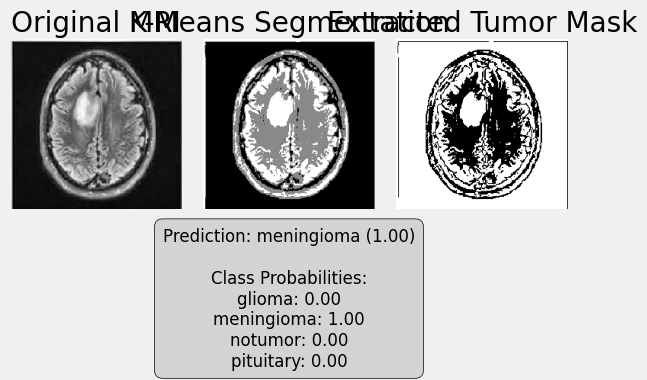

In [38]:
image_paths = [r"C:\Users\User\Downloads\images (2).jpg"]

for path in image_paths:
    process_image(path)